# Проект по создание дашборда по пользовательским событиям для агрегатора новостей

**Цель проекта** - создать для менеджеров дашборд, основывающийся на пайплайне, созданном дата-инженерами, который будет отображать анализ пользовательского взаимодействия с карточками статей агрегатора новостей.

**Задачи проекта:**
1. Подготовить графики по заданным параметрам.
2. Сгруппировать графики по заданным параметрам.
3. Оформить дашборд в соответствии с согласованным макетом.

**Описание новостного агрегатора:**

Каждая статья, размещенная в агрегаторе, имеет свою карточку. Каждую карточку определяют её тема и источник (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия».

Пользователей системы характеризует возрастная категория, например: «26-30» или «45+».

Есть три способа взаимодействия пользователей с системой:
- Карточка отображена для пользователя (**_show_**);
- Пользователь кликнул на карточку (**_click_**);
- Пользователь просмотрел статью карточки (**_view_**).
___

# Согласованное ТЗ на разработку дашборда

**Состав данных для дашборда:**
* История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
* Разбивка событий по темам источников;
* Таблица соответствия тем источников темам карточек;

**По каким параметрам данные должны группироваться:**
* Дата и время;
* Тема карточки;
* Тема источника;
* Возрастная группа;

**Характер данных:**
* История событий по темам карточек — абсолютные величины с разбивкой по минутам;
* Разбивка событий по темам источников — относительные величины (% событий);
* Соответствия тем источников темам карточек - абсолютные величины;

**Макет дашборда**

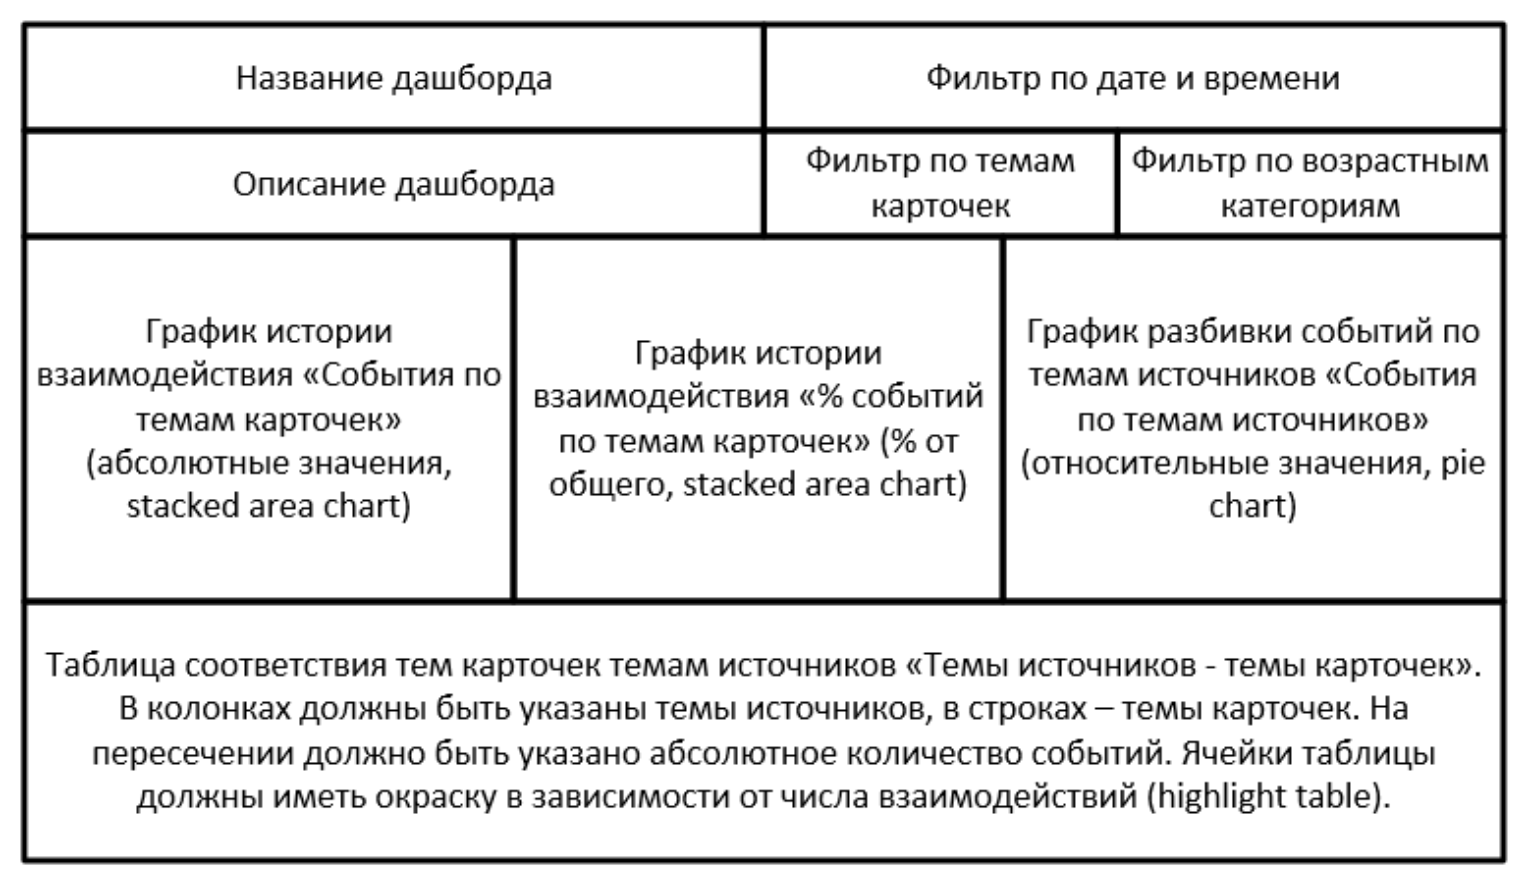


# Резюме

После подключения к БД и визуальной проверки её содержания, данные были выгружены в файл формата `csv`, на основании которого строились графики для [дашборда](https://public.tableau.com/app/profile/anna3994/viz/Zen_Dashboard_manuilova_ver_2/sheet4).
По результатам визуализации данных была подготовлена [презентация](https://disk.yandex.ru/i/u6GQOiFkIgJDzQ) с анализом пользовательского взаимодействия с карточками статей (анализ проводился по содержанию графиков).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Синхронизация" data-toc-modified-id="Синхронизация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Синхронизация</a></span></li><li><span><a href="#Выгрузка-данных-из-БД" data-toc-modified-id="Выгрузка-данных-из-БД-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выгрузка данных из БД</a></span></li><li><span><a href="#Загрузка-данных-в-файл-формата-csv" data-toc-modified-id="Загрузка-данных-в-файл-формата-csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка данных в файл формата csv</a></span></li></ul></div>

## Импорт библиотек

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

## Синхронизация

In [2]:
db_config = {'user': 'user', # имя пользователя
            'pwd': 'password', # пароль
            'host': 'host',
            'port': 1111, # порт подключения
            'db': 'database_name'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 


## Выгрузка данных из БД

In [6]:
dash_visits = pd.io.sql.read_sql('SELECT * FROM dash_visits', con = engine) 

dash_visits.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


## Загрузка данных в файл формата csv

In [7]:
dash_visits.to_csv('dash_visits.csv')